In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

session.query(measurement.date).\
filter(measurement.date < '2017-08-23').\
order_by(measurement.date).all()



[('2010-01-01',),
 ('2010-01-01',),
 ('2010-01-01',),
 ('2010-01-01',),
 ('2010-01-01',),
 ('2010-01-01',),
 ('2010-01-01',),
 ('2010-01-02',),
 ('2010-01-02',),
 ('2010-01-02',),
 ('2010-01-02',),
 ('2010-01-02',),
 ('2010-01-02',),
 ('2010-01-02',),
 ('2010-01-03',),
 ('2010-01-03',),
 ('2010-01-03',),
 ('2010-01-03',),
 ('2010-01-03',),
 ('2010-01-03',),
 ('2010-01-03',),
 ('2010-01-04',),
 ('2010-01-04',),
 ('2010-01-04',),
 ('2010-01-04',),
 ('2010-01-04',),
 ('2010-01-04',),
 ('2010-01-04',),
 ('2010-01-05',),
 ('2010-01-05',),
 ('2010-01-05',),
 ('2010-01-05',),
 ('2010-01-05',),
 ('2010-01-05',),
 ('2010-01-06',),
 ('2010-01-06',),
 ('2010-01-06',),
 ('2010-01-06',),
 ('2010-01-06',),
 ('2010-01-06',),
 ('2010-01-07',),
 ('2010-01-07',),
 ('2010-01-07',),
 ('2010-01-07',),
 ('2010-01-07',),
 ('2010-01-07',),
 ('2010-01-07',),
 ('2010-01-08',),
 ('2010-01-08',),
 ('2010-01-08',),
 ('2010-01-08',),
 ('2010-01-08',),
 ('2010-01-08',),
 ('2010-01-08',),
 ('2010-01-09',),
 ('2010-01

In [12]:
# Calculate the date one year from the last date in data set.

one_year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
print(f"The date one year before the most recent date in the data is: {one_year_ago}")

The date one year before the most recent date in the data is: 2016-08-23


In [13]:
# Perform a query to retrieve the data and precipitation scores

date_and_prcp = session.query(measurement.date,measurement.prcp).\
filter(measurement.date >= '2016-08-23').\
order_by(measurement.date).all()

date_and_prcp

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [14]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names

date_and_prcp_DF = pd.DataFrame(date_and_prcp)
date_and_prcp_DF = date_and_prcp_DF.rename(columns={'date':'Date','prcp':"Precipitation"})
date_and_prcp_DF

,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02
...,...,...
2225,2017-08-22,0.50
2226,2017-08-23,0.00
2227,2017-08-23,0.00
2228,2017-08-23,0.08


In [15]:
# Sort the dataframe by date
date_and_prcp_DF = date_and_prcp_DF.sort_values(by = 'Date')
date_and_prcp_DF

,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02
...,...,...
2225,2017-08-22,0.50
2228,2017-08-23,0.08
2226,2017-08-23,0.00
2227,2017-08-23,0.00


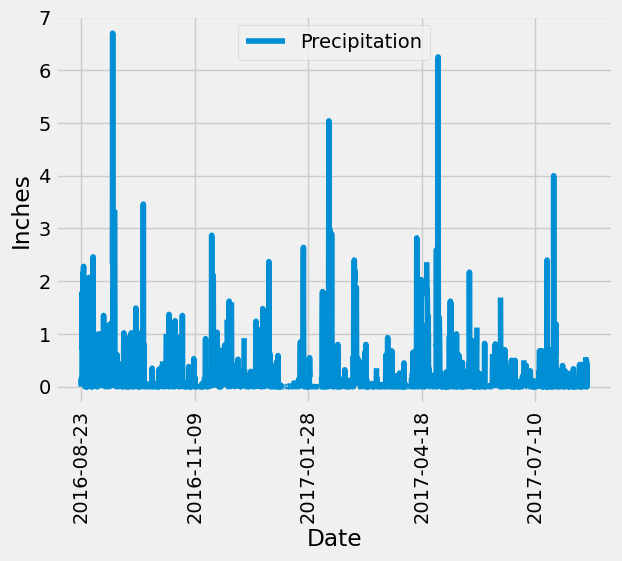

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data

date_and_prcp_DF.plot(x='Date',grid=True)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.xticks(rotation= 90)

plt.show()

In [17]:
# Use Pandas to calculate the summary statistics for the precipitation data
date_and_prcp_DF.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [18]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(station.station)).first()

(9,)

In [19]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_activity = session.query(measurement.station , func.count(measurement.station)).group_by(measurement.station).\
               order_by(func.count(measurement.station).desc()).all()
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = session.query(func.min(measurement.tobs), func.max(measurement.tobs),func.avg(measurement.tobs)).\
                      filter(measurement.station == 'USC00519281' ).all()

most_active

[(54.0, 85.0, 71.66378066378067)]

In [21]:
# Using the most active station id
# First find the most recent date for the most active station
active_recent_date = session.query(measurement.date).filter(measurement.station == 'USC00519281').\
                     order_by(measurement.date.desc()).first()
active_recent_date

('2017-08-18',)

In [30]:
# Now find a year earlier from that date
yearago_active = dt.date(2017, 8, 18) - dt.timedelta(days = 365)
yearago_active

datetime.date(2016, 8, 18)

In [39]:
# Query the last 12 months of temperature observation data for this station
active_temps = session.query(measurement.tobs).filter(measurement.date >= '2016-08-18').\
               filter(measurement.station == 'USC00519281').all()
active_temps

[(80.0,),
 (79.0,),
 (81.0,),
 (79.0,),
 (78.0,),
 (77.0,),
 (77.0,),
 (80.0,),
 (80.0,),
 (75.0,),
 (73.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (80.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (73.0,),
 (74.0,),
 (80.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (76.0,),
 (79.0,),
 (75.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (78.0,),
 (79.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (72.0,),
 (71.0,),
 (77.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (77.0,),
 (79.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (74.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (74.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (71.0,),
 (63.0,),
 (70.0,),
 (68.0,),
 (67.0,),
 (77.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (75.0,),
 (76.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (74.0,),


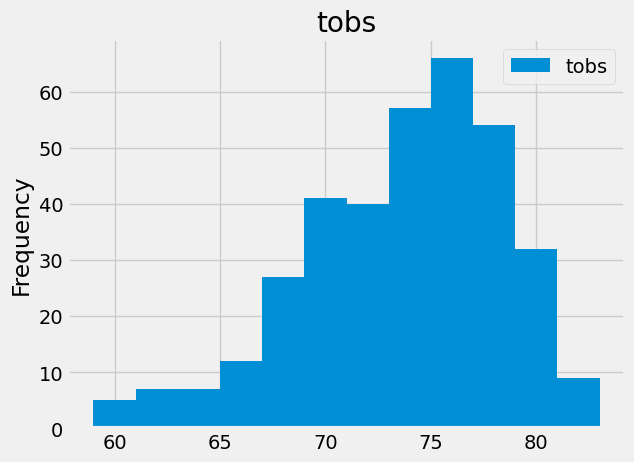

In [40]:
# Find the temperature observation data for the last 12 months for that station and plot a histogram
active_temps_df = pd.DataFrame(active_temps,columns=['tobs'])

active_temps_df.hist(bins=12)
labels = ['tobs']
plt.ylabel('Frequency')
plt.legend(labels)
plt.show()

# Close Session

In [25]:
# Close Session
session.close()